In [79]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [80]:
path_to_clean_df='../../data/clean.csv'
df=pd.read_csv(path_to_clean_df)

### Number of songs per decade: ###

decade
2010.0    185322
2000.0     93474
2020.0     53546
1990.0     42431
1980.0     19391
1970.0     16091
1960.0      9471
1950.0      1748
Name: count, dtype: int64


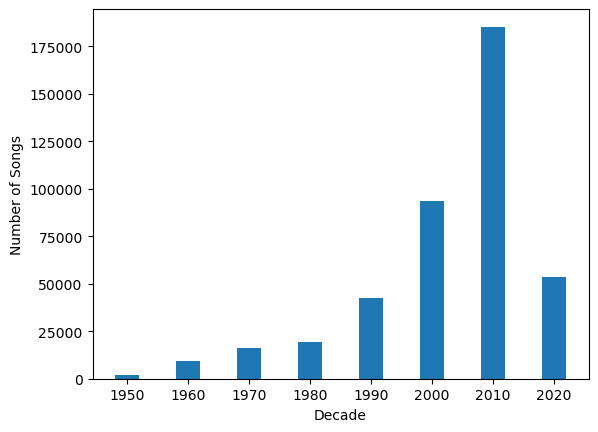

In [81]:
yrs=df['decade'].value_counts()
print(yrs)
plt.bar(yrs.index,yrs,width=4)
plt.xlabel('Decade')
plt.ylabel('Number of Songs')
plt.show()

### Number of songs per genre ###

main_genre
pop            85105
rock           67161
country        53211
alternative    47214
pop rock       39531
punk           16053
metal          11304
rap            11109
soul            7341
jazz            6873
reggae          3821
electronic      2812
Name: count, dtype: int64


Text(0, 0.5, 'Main Genre')

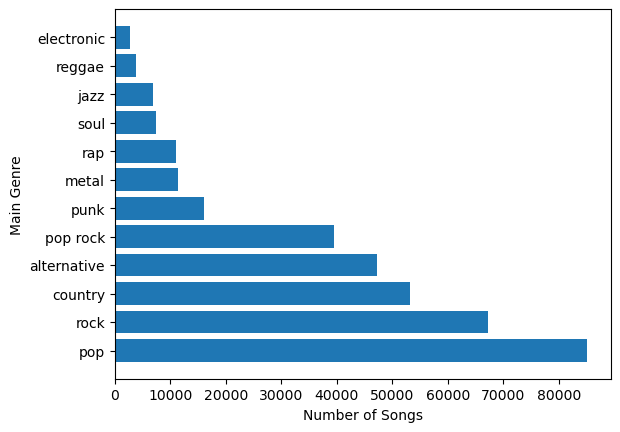

In [82]:
grs=df['main_genre'].value_counts()
print(grs)
plt.barh(grs.index,grs)
plt.xlabel('Number of Songs')
plt.ylabel('Main Genre')

### Number of songs per number of sections: ###

In [83]:
secs=df['num_sections'].value_counts()
print(secs)

num_sections
1      187097
7       56550
6       50487
8       46152
5       33705
        ...  
42          1
203         1
140         1
47          1
36          1
Name: count, Length: 125, dtype: int64


There are some crazy outliers, some songs have 100+ sections. Plot only those $\leq$ 20 sections, which end up comprising more than 99% of the data.

num_sections
1     187097
7      56550
6      50487
8      46152
5      33705
9      28751
4      22372
10     15655
3      11117
2       8915
11      7953
12      4056
13      2069
14      1087
15       575
16       424
17       207
18       147
19        74
20        74
Name: count, dtype: int64
477467


Text(0.5, 0, 'Number of Sections')

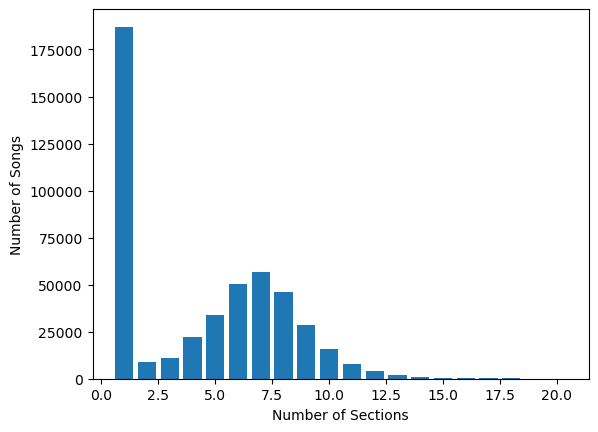

In [84]:
#bar plot
secs=df[df['num_sections']<=20].num_sections.value_counts()
print(secs)
print(secs.sum()) #accounts for over 99.9% of data
plt.bar(secs.index,secs)
plt.ylabel('Number of Songs')
plt.xlabel('Number of Sections')

From this, it's apparent that a great deal of the time, those who contributed chords didn't bother to separate their songs into sections. Therefore, these section labels aren't reliable and no further analysis involving sections should be done.

### Songs per total unique chords: ###

In [85]:
uchords=df.tot_unique_chords.value_counts().sort_index()
print(uchords)

tot_unique_chords
2       6143
3      41900
4      92585
5      87037
6      71187
       ...  
112        1
113        2
114        1
125        1
165        1
Name: count, Length: 102, dtype: int64


Again, some huge outliers. Limit plot to songs with $\leq$ 30 unique chords, which account for over 99.5% of all data.

tot_unique_chords
4     92585
5     87037
6     71187
7     50139
3     41900
8     34162
9     23581
10    17002
11    12212
12     9046
13     6676
2      6143
14     5147
15     3865
16     2996
17     2456
18     1931
19     1562
20     1266
21     1054
22      834
23      720
24      592
25      508
26      416
27      339
28      337
29      248
30      226
Name: count, dtype: int64
476167


Text(0.5, 0, 'Number of Unique Chords')

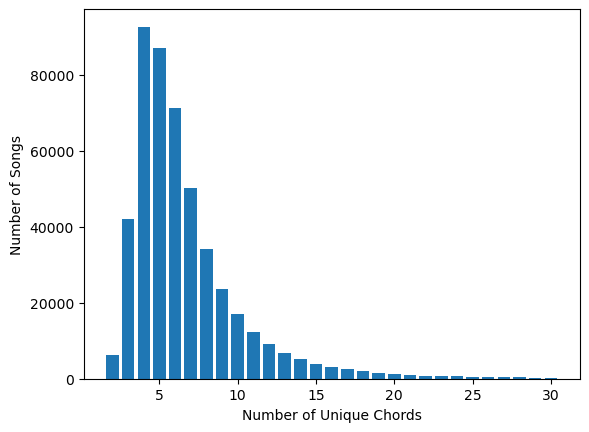

In [86]:

uchords=df[df['tot_unique_chords']<=30].tot_unique_chords.value_counts()
print(uchords)
print(uchords.sum()) #accounts for over 99.5% of data
plt.bar(uchords.index,uchords)
plt.ylabel('Number of Songs')
plt.xlabel('Number of Unique Chords')

<Figure size 640x480 with 0 Axes>

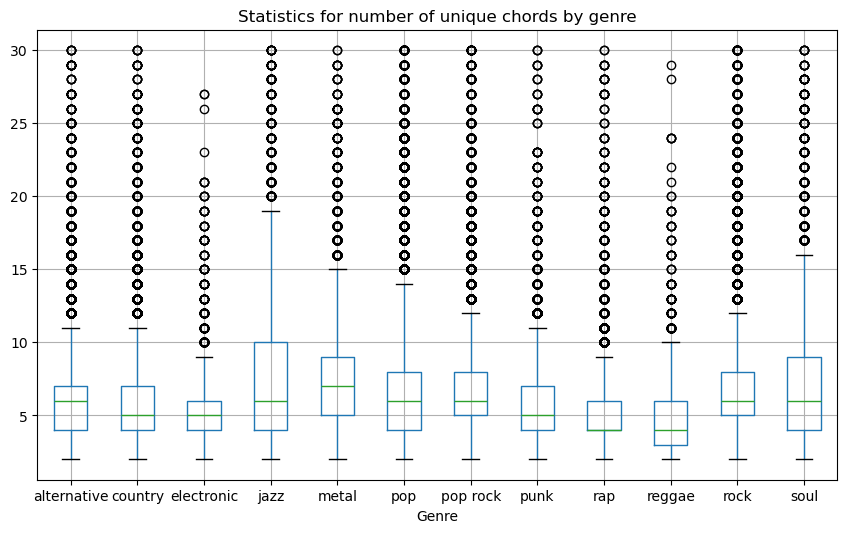

In [87]:
#box and whisker grouped by genre
plt.figure()
df[df['tot_unique_chords']<=30].boxplot(column='tot_unique_chords',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for number of unique chords by genre')
plt.show()

In [88]:
#mean number of unique chords per genre
df[['tot_unique_chords','main_genre']].groupby('main_genre').mean()

,tot_unique_chords
main_genre,
alternative,6.227750
country,5.736897
electronic,5.648293
jazz,8.497308
metal,7.693206
pop,6.851489
pop rock,7.295793
punk,5.913910
rap,5.346926


Rap, reggae and electronic all have low medians/3rd quartiles and means. Metal, soul and jazz have the highest medians/3rd quartiels and means.

<Figure size 640x480 with 0 Axes>

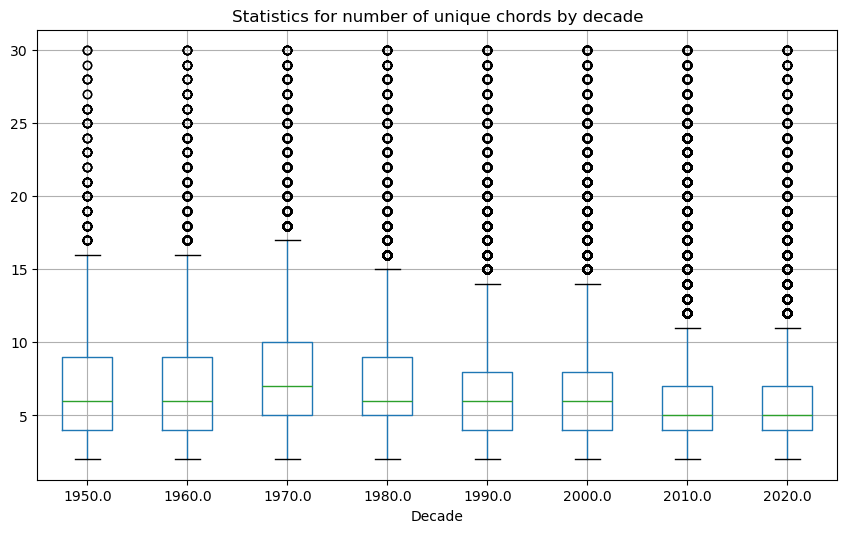

In [89]:
#box and whisker grouped by decade
plt.figure()
df[df['tot_unique_chords']<=30].boxplot(column='tot_unique_chords',by='decade',figsize=(10,6))
plt.xlabel('Decade')
plt.suptitle('')
plt.title('Statistics for number of unique chords by decade')
plt.show()

In [90]:
#mean number of unique chords per decade
df[['tot_unique_chords','decade']].groupby('decade').mean()

,tot_unique_chords
decade,
1950.0,7.759153
1960.0,7.624221
1970.0,8.187496
1980.0,7.672425
1990.0,7.126393
2000.0,6.676776
2010.0,6.350762
2020.0,6.465824


The means and interquartile distributions for post-2000's music seem to be lower than the rest.

### Songs by total number of chords: ###

In [91]:
tchords=df.tot_chords.value_counts().sort_index()
print(tchords)


tot_chords
5        495
6        585
7        658
8       1003
9        923
        ... 
2243       1
2261       1
2356       1
2392       1
2484       1
Name: count, Length: 929, dtype: int64


Once again, large outliers. Restrict plot to songs using $\leq$ 250 chords, which comprise more than 99.5% of total data. Since this feature is more continuous than the others, use histrogram instead of bar plot.

tot_chords
72     5939
64     5927
60     5900
56     5687
61     5586
       ... 
250      25
249      23
245      20
243      20
244      19
Name: count, Length: 246, dtype: int64
476058


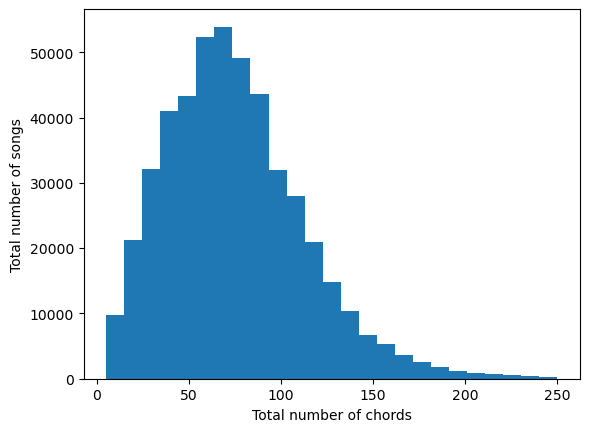

In [92]:
tchords=df[df['tot_chords']<=250].tot_chords.value_counts()
print(tchords)
print(tchords.sum()) #accounts for more than 99.5% data
#plt.bar(tchords.index,uchords)
plt.hist(df[df['tot_chords']<=250]['tot_chords'],bins=25)
plt.xlabel('Total number of chords')
plt.ylabel('Total number of songs')
plt.show()

<Figure size 640x480 with 0 Axes>

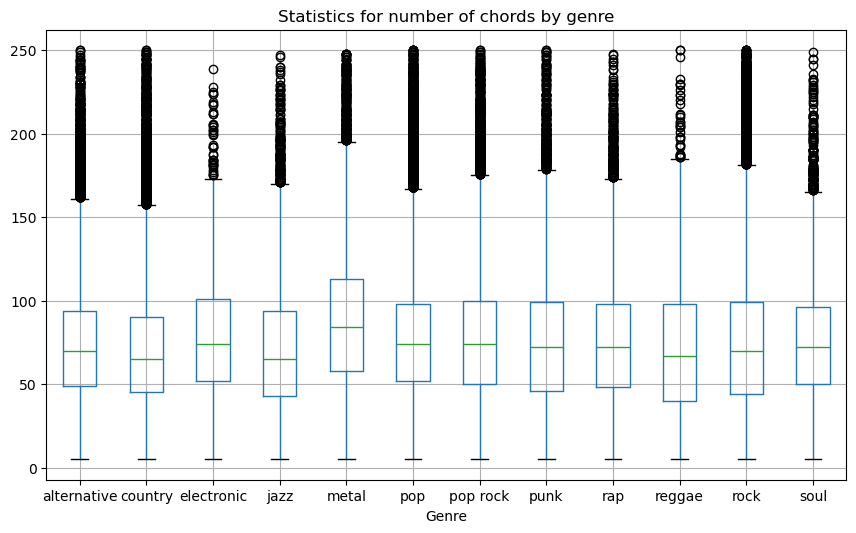

In [93]:
#box and whisker grouped by genre
plt.figure()
df[df['tot_chords']<=250].boxplot(column='tot_chords',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for number of chords by genre')
plt.show()

In [94]:
#mean number of chords per genre
df[['tot_chords','main_genre']].groupby('main_genre').mean()

,tot_chords
main_genre,
alternative,75.077795
country,71.326718
electronic,78.805477
jazz,73.187400
metal,91.565287
pop,79.448693
pop rock,81.295894
punk,78.371582
rap,76.883248


Metal again jumps out as having the highest statistics.

<Figure size 640x480 with 0 Axes>

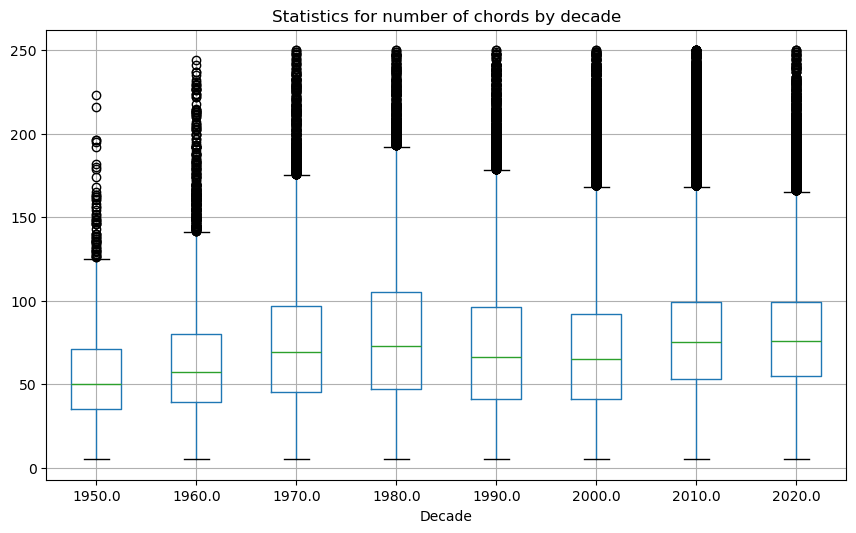

In [95]:
#box and whisker grouped by decade
plt.figure()
df[df['tot_chords']<=250].boxplot(column='tot_chords',by='decade',figsize=(10,6))
plt.xlabel('Decade')
plt.suptitle('')
plt.title('Statistics for number of chords by decade')
plt.show()

In [96]:
#mean number of chords per decade
df[['tot_chords','decade']].groupby('decade').mean()

,tot_chords
decade,
1950.0,56.840961
1960.0,63.860416
1970.0,77.017028
1980.0,80.955907
1990.0,73.298225
2000.0,70.295430
2010.0,78.654002
2020.0,79.859728


The interquartile distributions and means of total number of chords seem to be steadily rising since the 1950's.

### Songs per unique chord density: ####

count    477940.000000
mean          0.111964
std           0.086834
min           0.005435
25%           0.059524
50%           0.086957
75%           0.133333
max           1.000000
Name: unique_chord_density, dtype: float64


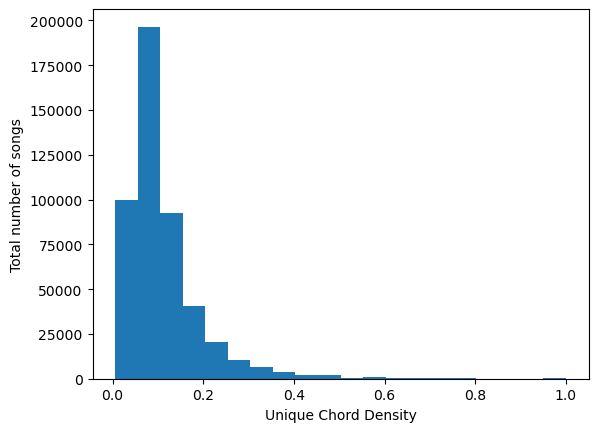

In [97]:
plt.hist(df.unique_chord_density,bins=20)
print(df.unique_chord_density.describe())
plt.xlabel('Unique Chord Density')
plt.ylabel('Total number of songs')
plt.show()

<Figure size 640x480 with 0 Axes>

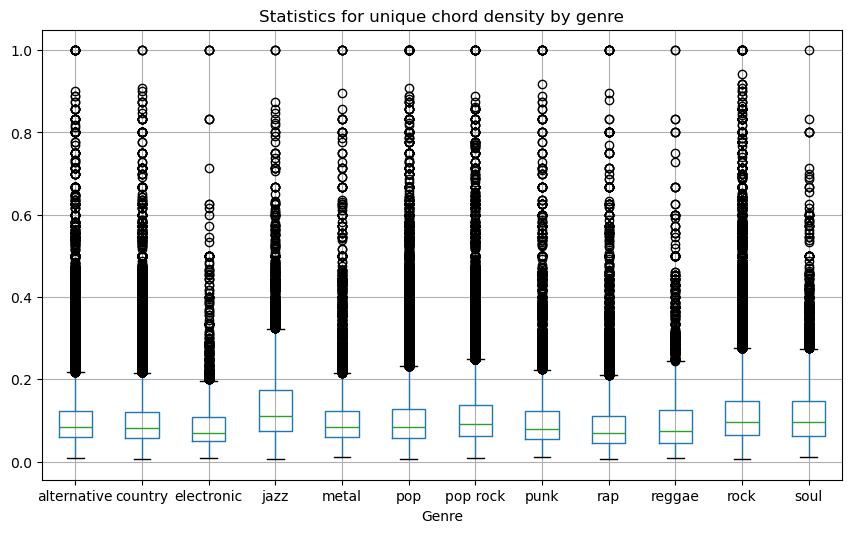

In [98]:
#box and whisker grouped by genre
plt.figure()
df.boxplot(column='unique_chord_density',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for unique chord density by genre')
plt.show()

In [99]:
#mean number of chords per decade
df[['unique_chord_density','main_genre']].groupby('main_genre').mean()

,unique_chord_density
main_genre,
alternative,0.104668
country,0.102592
electronic,0.096527
jazz,0.141217
metal,0.105591
pop,0.106887
pop rock,0.115380
punk,0.107220
rap,0.097070


Jazz is far ahead of the others in terms of mean and interquartile distribution

<Figure size 640x480 with 0 Axes>

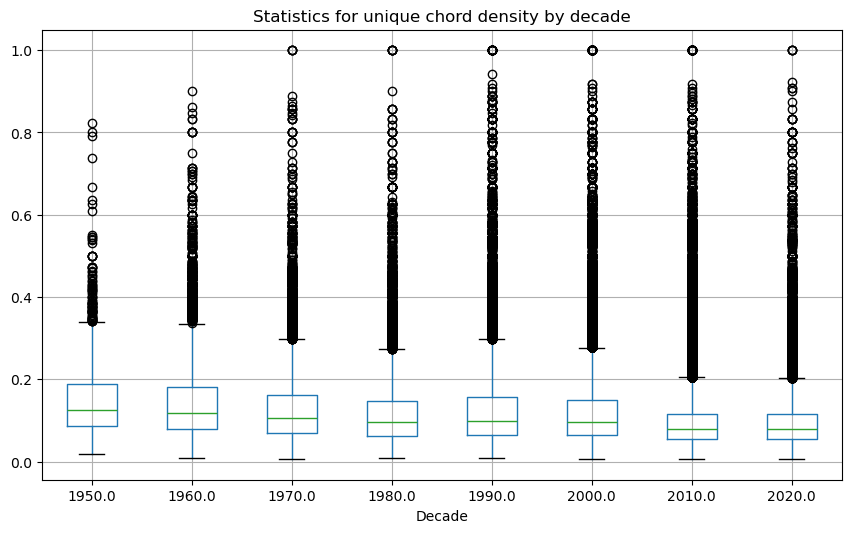

In [100]:
#box and whisker grouped by decade
plt.figure()
df.boxplot(column='unique_chord_density',by='decade',figsize=(10,6))
plt.xlabel('Decade')
plt.suptitle('')
plt.title('Statistics for unique chord density by decade')
plt.show()

In [101]:
#mean number of chords per decade
df[['unique_chord_density','decade']].groupby('decade').mean()

,unique_chord_density
decade,
1950.0,0.150921
1960.0,0.145905
1970.0,0.130929
1980.0,0.120849
1990.0,0.129683
2000.0,0.124819
2010.0,0.097795
2020.0,0.095962


The mean and interquartile distributions seem to generally be shifting lower over time since the 1940's.

### TL;DR: ### 
For unique 2,3,4 and 5-gram density analyses (and 2-gram density difference), the decade split results are all similar to unique chord density. The genre-split results are mostly similar too, with differences starting to emerge at n=4 or 5. So only one or two of these might be useful features.

##### Songs per unique 2-gram density: ####

count    477940.000000
mean          0.202760
std           0.136772
min           0.005435
25%           0.108911
50%           0.166667
75%           0.255814
max           0.981481
Name: unique_2gram_density, dtype: float64


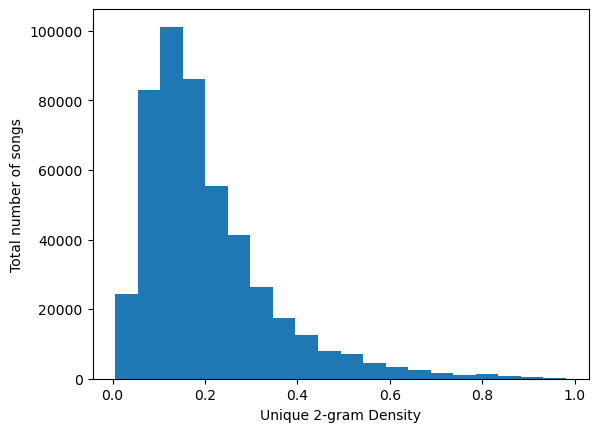

In [104]:
plt.hist(df.unique_2gram_density,bins=20)
print(df.unique_2gram_density.describe())
plt.xlabel('Unique 2-gram Density')
plt.ylabel('Total number of songs')
plt.show()

<Figure size 640x480 with 0 Axes>

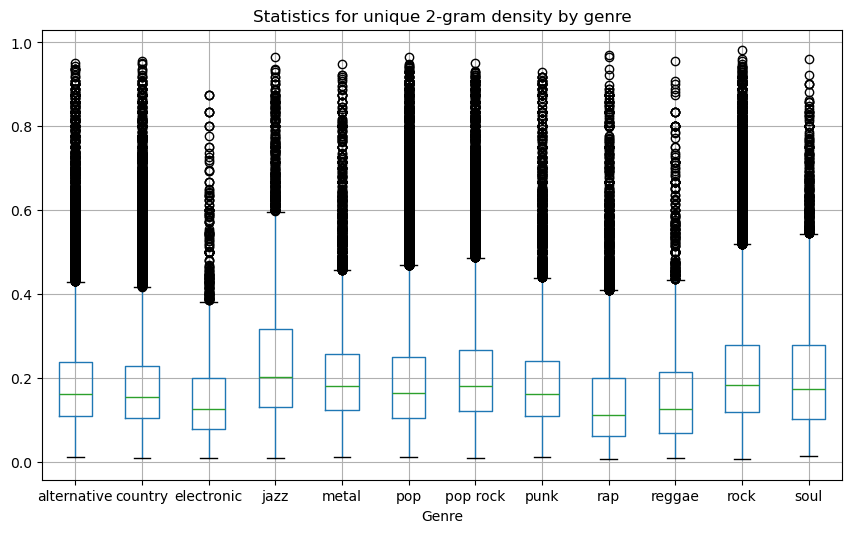

In [105]:
#box and whisker grouped by genre
plt.figure()
df.boxplot(column='unique_2gram_density',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for unique 2-gram density by genre')
plt.show()

In [106]:
#mean unique 2-gram density per genre
df[['unique_2gram_density','main_genre']].groupby('main_genre').mean()

,unique_2gram_density
main_genre,
alternative,0.189905
country,0.185600
electronic,0.161794
jazz,0.245261
metal,0.207368
pop,0.195840
pop rock,0.213033
punk,0.195961
rap,0.156155


Again, jazz sticks typically has higher statistics, electronic and rap have lower statistics.

<Figure size 640x480 with 0 Axes>

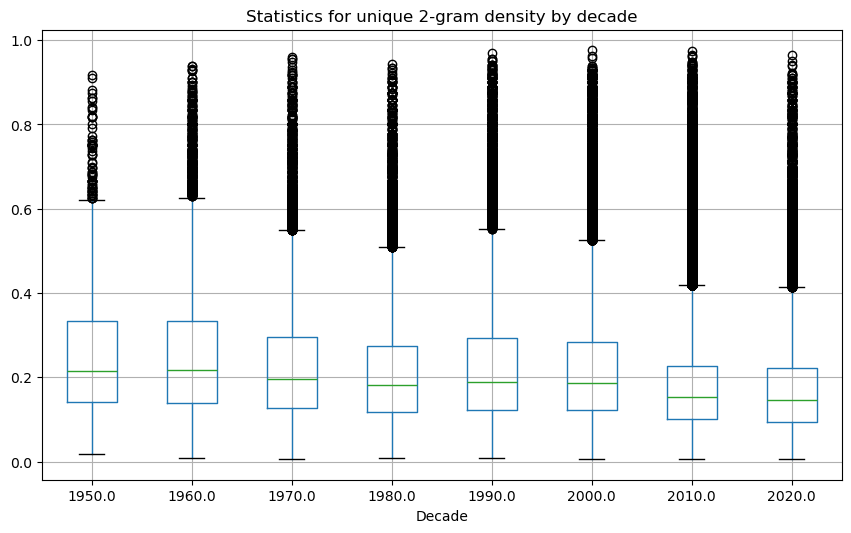

In [107]:
#box and whisker grouped by decade
plt.figure()
df.boxplot(column='unique_2gram_density',by='decade',figsize=(10,6))
plt.xlabel('Decade')
plt.suptitle('')
plt.title('Statistics for unique 2-gram density by decade')
plt.show()

In [108]:
#mean unique 2-gram density per decade
df[['unique_2gram_density','decade']].groupby('decade').mean()

,unique_2gram_density
decade,
1950.0,0.260372
1960.0,0.255012
1970.0,0.231305
1980.0,0.217107
1990.0,0.229689
2000.0,0.224075
2010.0,0.180856
2020.0,0.175083


Still appears to be a bit of a downward trend over time.

##### Songs per unique 3-gram density: ####

count    477940.000000
mean          0.273282
std           0.166973
min           0.005435
25%           0.151515
50%           0.239130
75%           0.357143
max           0.981481
Name: unique_3gram_density, dtype: float64


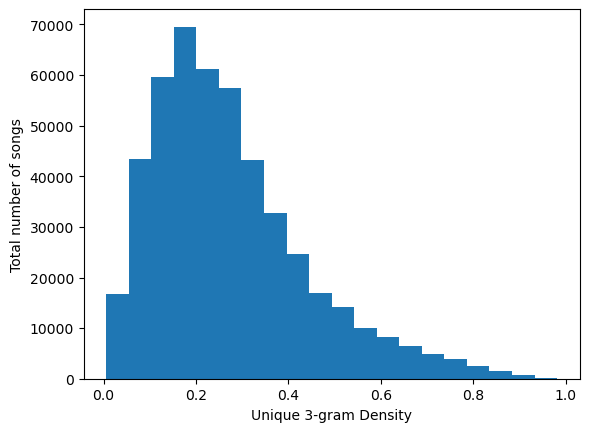

In [109]:
plt.hist(df.unique_3gram_density,bins=20)
print(df.unique_3gram_density.describe())
plt.xlabel('Unique 3-gram Density')
plt.ylabel('Total number of songs')
plt.show()

<Figure size 640x480 with 0 Axes>

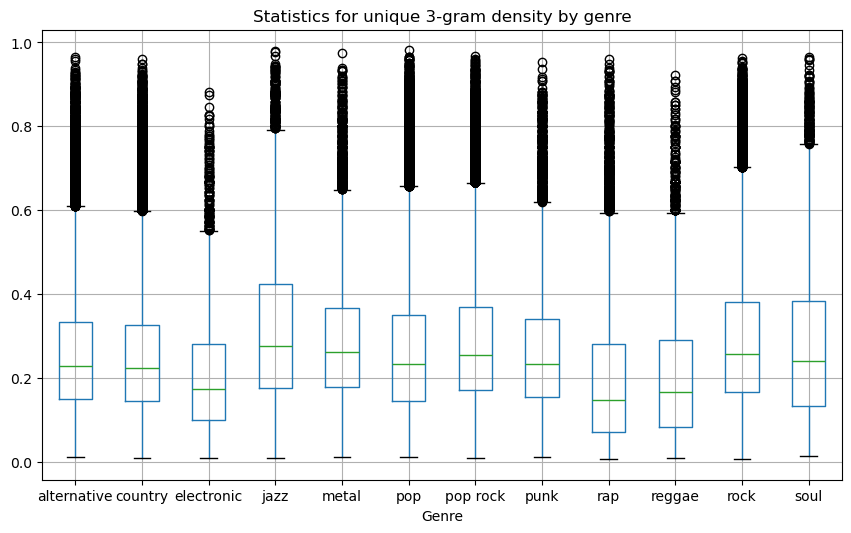

In [110]:
#box and whisker grouped by genre
plt.figure()
df.boxplot(column='unique_3gram_density',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for unique 3-gram density by genre')
plt.show()

In [111]:
#mean unique 3-gram density per genre
df[['unique_3gram_density','main_genre']].groupby('main_genre').mean()

,unique_3gram_density
main_genre,
alternative,0.258723
country,0.255122
electronic,0.213906
jazz,0.318841
metal,0.288061
pop,0.265174
pop rock,0.287138
punk,0.266168
rap,0.201839


Again, jazz has highest statistics and electronic, rap and reggae have the lowest.

<Figure size 640x480 with 0 Axes>

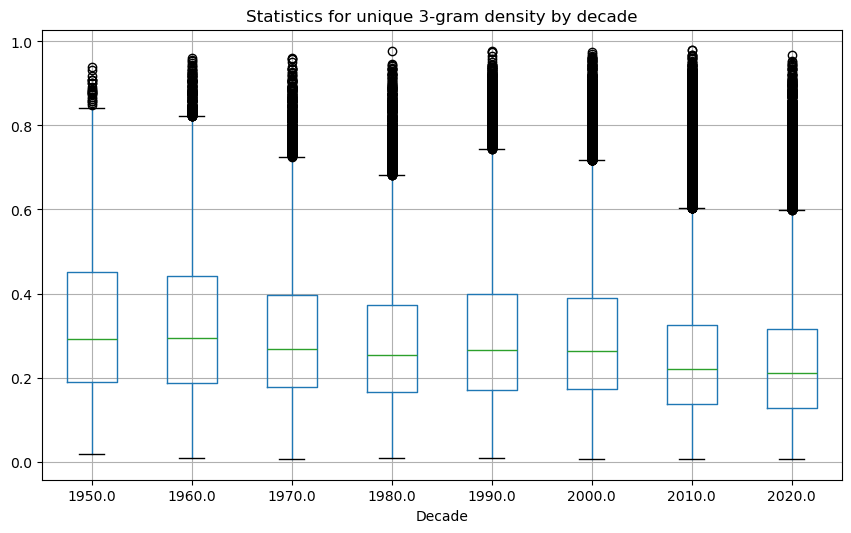

In [112]:
#box and whisker grouped by decade
plt.figure()
df.boxplot(column='unique_3gram_density',by='decade',figsize=(10,6))
plt.xlabel('Decade')
plt.suptitle('')
plt.title('Statistics for unique 3-gram density by decade')
plt.show()

In [113]:
#mean unique 3-gram density per decade
df[['unique_3gram_density','decade']].groupby('decade').mean()

,unique_3gram_density
decade,
1950.0,0.337044
1960.0,0.331824
1970.0,0.304065
1980.0,0.289128
1990.0,0.303423
2000.0,0.298534
2010.0,0.248651
2020.0,0.239530


Same gradual downward trend.

##### Songs per unique 4-gram density: ####

count    477940.000000
mean          0.329044
std           0.185313
min           0.005435
25%           0.190476
50%           0.300971
75%           0.437500
max           0.984772
Name: unique_4gram_density, dtype: float64


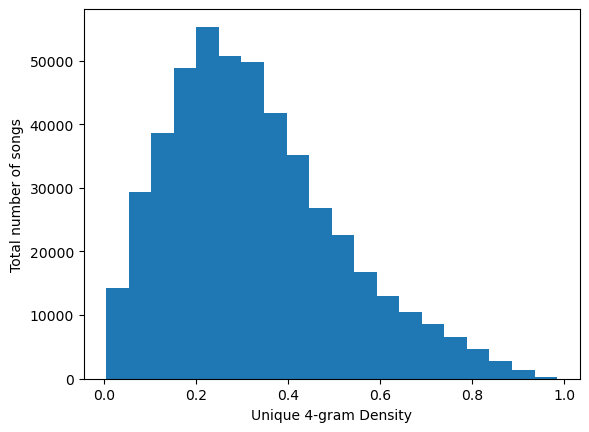

In [114]:
plt.hist(df.unique_4gram_density,bins=20)
print(df.unique_4gram_density.describe())
plt.xlabel('Unique 4-gram Density')
plt.ylabel('Total number of songs')
plt.show()

<Figure size 640x480 with 0 Axes>

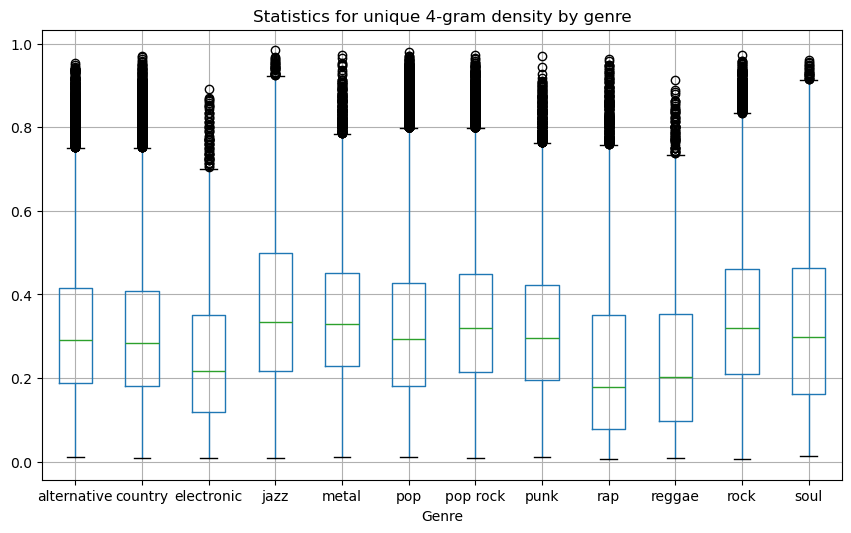

In [115]:
#box and whisker grouped by genre
plt.figure()
df.boxplot(column='unique_4gram_density',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for unique 4-gram density by genre')
plt.show()

In [116]:
#mean unique 4-gram density per genre
df[['unique_4gram_density','main_genre']].groupby('main_genre').mean()

,unique_4gram_density
main_genre,
alternative,0.315292
country,0.311809
electronic,0.257074
jazz,0.372607
metal,0.351310
pop,0.320293
pop rock,0.345191
punk,0.322822
rap,0.238653


Metal starting to rival jazz at the top, with electronic, rap and reggae still the lowest.

<Figure size 640x480 with 0 Axes>

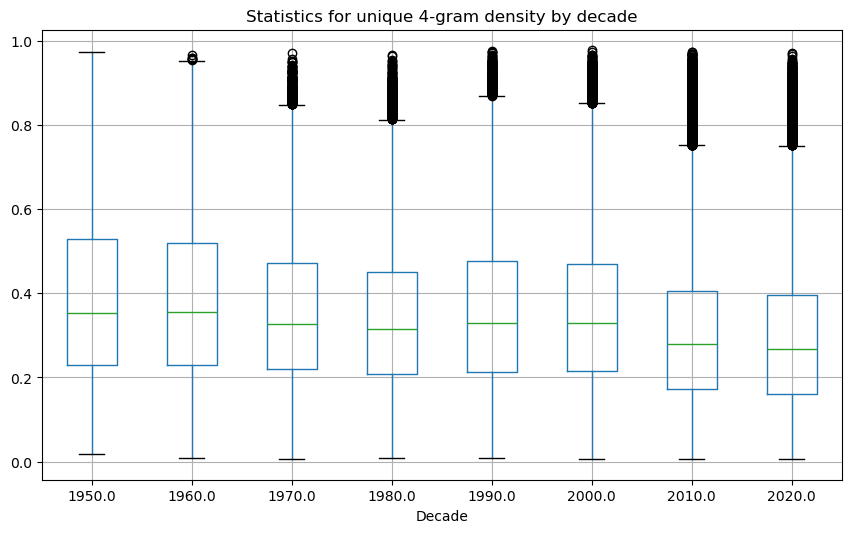

In [117]:
#box and whisker grouped by decade
plt.figure()
df.boxplot(column='unique_4gram_density',by='decade',figsize=(10,6))
plt.xlabel('Decade')
plt.suptitle('')
plt.title('Statistics for unique 4-gram density by decade')
plt.show()

In [118]:
#mean unique 4-gram density per decade
df[['unique_4gram_density','decade']].groupby('decade').mean()

,unique_4gram_density
decade,
1950.0,0.391217
1960.0,0.387529
1970.0,0.359069
1980.0,0.344551
1990.0,0.359128
2000.0,0.355812
2010.0,0.304301
2020.0,0.293088


Same general trend.

##### Songs per unique 5-gram density: ####

count    477940.000000
mean          0.373164
std           0.196325
min           0.005435
25%           0.226027
50%           0.352941
75%           0.500000
max           0.979695
Name: unique_5gram_density, dtype: float64


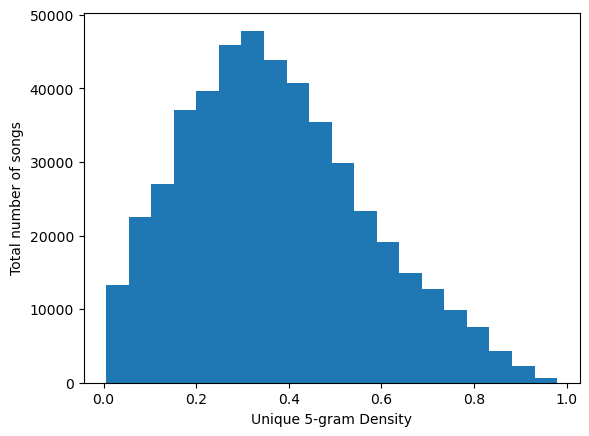

In [119]:
plt.hist(df.unique_5gram_density,bins=20)
print(df.unique_5gram_density.describe())
plt.xlabel('Unique 5-gram Density')
plt.ylabel('Total number of songs')
plt.show()

<Figure size 640x480 with 0 Axes>

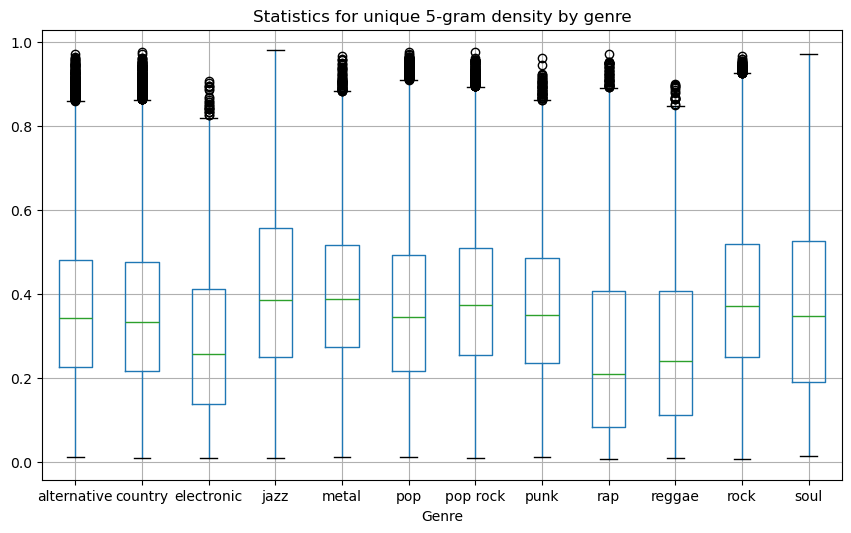

In [120]:
#box and whisker grouped by genre
plt.figure()
df.boxplot(column='unique_5gram_density',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for unique 5-gram density by genre')
plt.show()

In [121]:
#mean unique 5-gram density per genre
df[['unique_5gram_density','main_genre']].groupby('main_genre').mean()

,unique_5gram_density
main_genre,
alternative,0.361379
country,0.357071
electronic,0.292741
jazz,0.412607
metal,0.401409
pop,0.364380
pop rock,0.391071
punk,0.367873
rap,0.268088


Rap, reggae and electronic still clearly the lowest.

<Figure size 640x480 with 0 Axes>

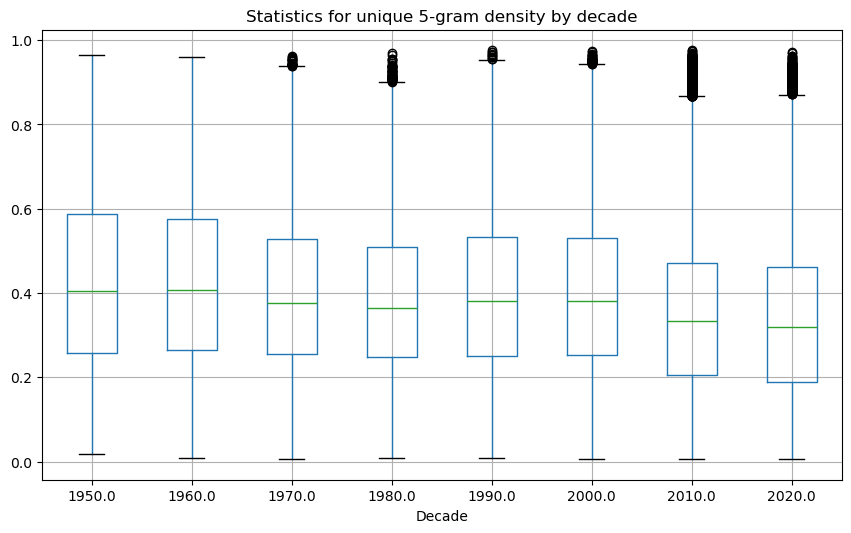

In [122]:
#box and whisker grouped by decade
plt.figure()
df.boxplot(column='unique_5gram_density',by='decade',figsize=(10,6))
plt.xlabel('Decade')
plt.suptitle('')
plt.title('Statistics for unique 5-gram density by decade')
plt.show()

In [123]:
#mean unique 5-gram density per decade
df[['unique_5gram_density','decade']].groupby('decade').mean()

,unique_5gram_density
decade,
1950.0,0.430490
1960.0,0.428155
1970.0,0.400965
1980.0,0.387955
1990.0,0.401223
2000.0,0.399817
2010.0,0.349721
2020.0,0.337441


Same tend.

#### Songs by unique 2-gram difference ####

count    477940.000000
mean          0.090795
std           0.068927
min          -0.200000
25%           0.042254
50%           0.076923
75%           0.123288
max           0.600000
Name: unique_2gram_difference, dtype: float64


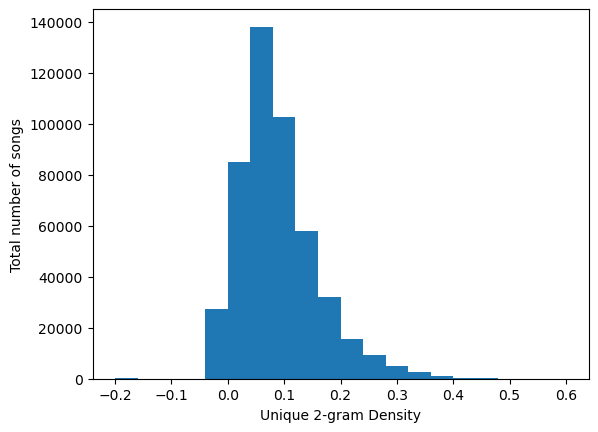

In [128]:
plt.hist(df.unique_2gram_difference,bins=20)
print(df.unique_2gram_difference.describe())
plt.xlabel('Unique 2-gram Density')
plt.ylabel('Total number of songs')
plt.show()

Songs with density -.2 represent those exactly 5 chords long; might remove these from data later.

<Figure size 640x480 with 0 Axes>

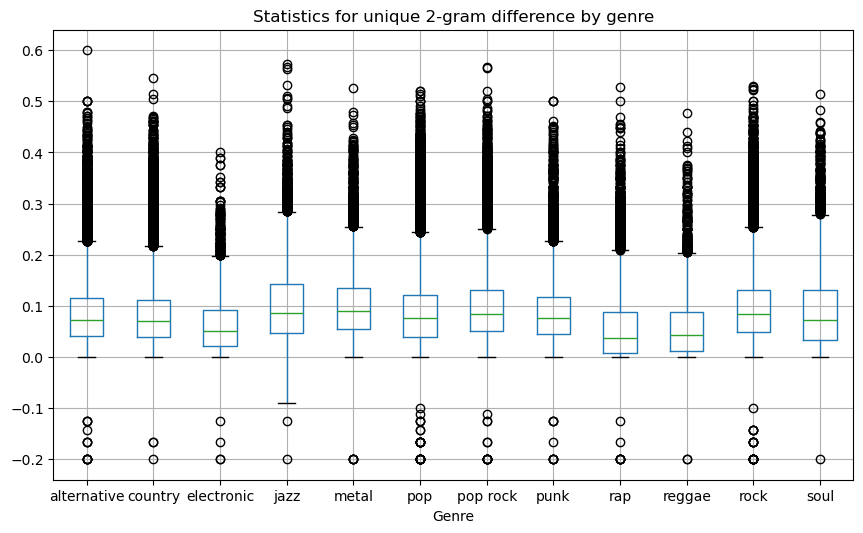

In [129]:
#box and whisker grouped by genre
plt.figure()
df.boxplot(column='unique_2gram_difference',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for unique 2-gram difference by genre')
plt.show()

In [130]:
#mean unique 2-gram  difference density per genre
df[['unique_2gram_difference','main_genre']].groupby('main_genre').mean()

,unique_2gram_difference
main_genre,
alternative,0.085237
country,0.083008
electronic,0.065267
jazz,0.104044
metal,0.101777
pop,0.088952
pop rock,0.097653
punk,0.088741
rap,0.059085


Rap, reggae and electronic clearly the lowest statistics.

<Figure size 640x480 with 0 Axes>

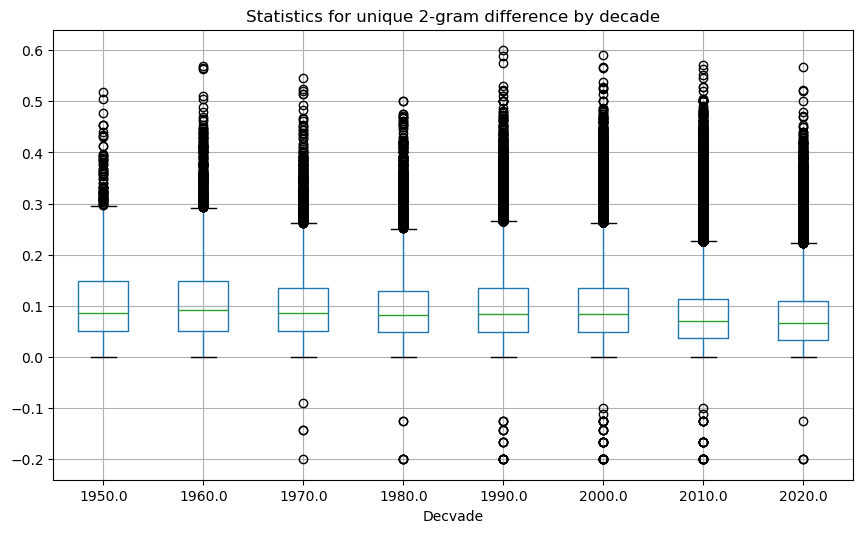

In [131]:
#box and whisker grouped by decade
plt.figure()
df.boxplot(column='unique_2gram_difference',by='decade',figsize=(10,6))
plt.xlabel('Decvade')
plt.suptitle('')
plt.title('Statistics for unique 2-gram difference by decade')
plt.show()

In [132]:
#mean unique 2-gram  difference density per decade
df[['unique_2gram_difference','decade']].groupby('decade').mean()

,unique_2gram_difference
decade,
1950.0,0.109452
1960.0,0.109108
1970.0,0.100376
1980.0,0.096257
1990.0,0.100006
2000.0,0.099257
2010.0,0.083061
2020.0,0.079121


Again, a seemingly downward trend over time.